<a href="https://colab.research.google.com/github/ddesai-sjsu/DataMiningFinalProject/blob/main/H1B_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **H1B LCA Prediction**


**Objective:** 

To predict if a H1B visa applicant may get the H1B LCA approved, from the given set of parameters.

**Dataset:**

We have taken the dataset from LCA (H-1B, H-1B1, E-3)  disclosure files which covers determinations issued between October 1, 2020, and September 30, 2021.

https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/LCA_Disclosure_Data_FY2021_Q1.xlsx

**Data Narative:**

This public disclosure file contains administrative data from employers’ Labor Condition
Applications (Form ETA-9035), as provided by the employer or representative, and the final determinations issued
by the Department’s Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA)
where the date of the determination was issued during the reporting period above.

Following are some of the fields we have used for training the model.

EMPLOYER_NAME: Legal business name of the employer submitting the Labor Condition
Application

NAICS_CODE: Industry code associated with the employer submitting the Labor
Condition Application, as classified by the North American Industrial
Classification System (NAICS). 

SOC_CODE: Occupational code associated with the job being requested for
temporary labor condition, as classified by the Standard Occupational
Classification (SOC) System.

FULL_TIME_POSITION: Y = Full Time Position; N = Part Time Position

NEW_EMPLOYMENT: Indicates requested worker(s) will begin employment for new employer,
as defined by USCIS.

CONTINUED_EMPLOYMENT: Indicates requested worker(s) will be continuing employment with same
employer, as defined by USCIS. 

CHANGE_PREVIOUS_EMPLOYMENT:  Indicates requested worker(s) will be continuing employment with same
employer without material change to job duties.

WORKSITE_STATE:  Geographic Information for First Worksite Location.

For detailed data narrative, please visit https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/LCA_Record_Layout_FY2021_Q4.pdf



## **Data Collection**

Import dataset from google drive & load it into a dataframe using pandas

In [1]:
import pandas as pd

In [2]:
!gdown --id 1ClwOCM37VfUw92MlRv5eGQy-dmmWnPRQ

Downloading...
From: https://drive.google.com/uc?id=1ClwOCM37VfUw92MlRv5eGQy-dmmWnPRQ
To: /content/LCA_Disclosure_Data_FY2021_Q1.xlsx
100% 59.7M/59.7M [00:00<00:00, 61.8MB/s]


In [3]:
df=pd.read_excel('/content/LCA_Disclosure_Data_FY2021_Q1.xlsx')

In [4]:
df_backup=df

In [ ]:
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,BEGIN_DATE,END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,TRADE_NAME_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_MIDDLE_NAME,EMPLOYER_POC_JOB_TITLE,EMPLOYER_POC_ADDRESS_1,EMPLOYER_POC_ADDRESS_2,EMPLOYER_POC_CITY,EMPLOYER_POC_STATE,EMPLOYER_POC_POSTAL_CODE,...,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,AGENT_ATTORNEY_EMAIL_ADDRESS,LAWFIRM_NAME_BUSINESS_NAME,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,WORKSITE_ADDRESS1,WORKSITE_ADDRESS2,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_TRACKING_NUMBER,PW_WAGE_LEVEL,PW_OES_YEAR,PW_OTHER_SOURCE,PW_OTHER_YEAR,PW_SURVEY_PUBLISHER,PW_SURVEY_NAME,TOTAL_WORKSITE_LOCATIONS,AGREE_TO_LC_STATEMENT,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-20268-843329,Certified,2020-09-24,2020-10-01,NaT,H-1B,Senior Technical Architect,15-1132,"Software Developers, Applications",Y,2021-02-13,2024-02-12,1,0,1,0,0,0,0,Hexaware Technologies Inc.,NaN,101 Wood Ave. S.,Suite 600,Iselin,NJ,8830,UNITED STATES OF AMERICA,NaN,16094096957,NaN,541512,Fernando,Caroline,NaN,Deputy Manager - Human Resources,101 Wood Ave. S.,Suite 600,Iselin,NJ,8830,...,1.646419e+10,NaN,gov@poorvichothani.com,"The Law Office of Poorvi Chothani, PLLC",NY,NEW YORK,1,Yes,Fannie Mae,"13150 World Gate Drive,",NaN,"Herndon,",FAIRFAX,VA,20170,103770.0,110770.0,Year,97406.0,Year,NaN,II,7/1/2020 - 6/30/2021,NaN,NaN,NaN,NaN,2,Y,Y,N,Y,Wage,NaN,Disclose Business,Chothani,Poorvi,R,"The Law office of Poorvi Chothani, PLLC",gov@poorvichothani.com
1,I-200-20268-843033,Certified,2020-09-24,2020-10-01,NaT,H-1B,Programmer Analyst\t,15-1131,Computer Programmers,Y,2020-09-24,2023-09-23,1,0,1,0,0,0,0,WIPRO LIMITED,NaN,2 TOWER CENTER BLVD,SUITE 2200,EAST BRUNSWICK,NJ,8816,UNITED STATES OF AMERICA,NaN,17325091586,NaN,541511,KAMBLE,DEEPALI,NaN,MANAGER,2 TOWER CENTER BLVD,SUITE 2200,EAST BRUNSWICK,NJ,8816,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,BP International Ltd.,2800 FM 519 East,NaN,Texas City,GALVESTON,TX,77590,84510.0,NaN,Year,84510.0,Year,NaN,II,7/1/2020 - 6/30/2021,NaN,NaN,NaN,NaN,1,Y,Y,N,Y,Wage,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-20268-843527,Certified,2020-09-24,2020-10-01,NaT,H-1B,Software Developer,15-1132,"Software Developers, Applications",Y,2020-09-25,2023-09-24,6,1,1,1,1,1,1,"Mastech Digital InfoTech, Inc.","Mastech Digital InfoTech, Inc.",1305 Cherrington Parkway,"Bldg. 210, Suite 400",Moon Township,PA,15108,UNITED STATES OF AMERICA,PENNSYLVANIA,14127879553,NaN,541511,Palermo,Wendy,NaN,Manager - Immigration,1305 Cherrington Parkway,"Bldg. 210, Ste 400",Moon Township,PA,15108,...,NaN,NaN,NaN,NaN,NaN,NaN,6,Yes,PNC Bank,8100 Mohawk Dr,NaN,Strongsville,CUYAHOGA,OH,44136,70678.0,85678.0,Year,70678.0,Year,NaN,II,7/1/2020 - 6/30/2021,NaN,NaN,NaN,NaN,2,Y,Y,N,Y,Wage,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-20268-844241,Certified,2020-09-24,2020-10-01,NaT,H-1B,JAVA ANALYST 2,15-1121,Computer Systems Analysts,Y,2020-10-01,2023-09-30,1,0,0,0,0,0,1,VIRTUSA CORPORATION,NaN,132 Turnpike Road,SUITE 300,Southborough,MA,1772,UNITED STATES OF AMERICA,Massachusetts,15083897451,NaN,541511,CHAU,QUYEN,NaN,ASSOCIATE DIRECTOR - HR,132 TURNPIKE ROAD,SUITE 300,SOUTHBOROUGH,MA,1772,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,"UNITED HEALTHCARE SERVICES, INC.",185 ASYLUM STREET,NaN,HARTFORD,HARTFORD

In [ ]:
len(df)

80622

##**Data Visualization**

In [ ]:
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS_1',
       'EMPLOYER_POC_ADDRESS_2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_P

### **Case Status v/s Number of Petitions**

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

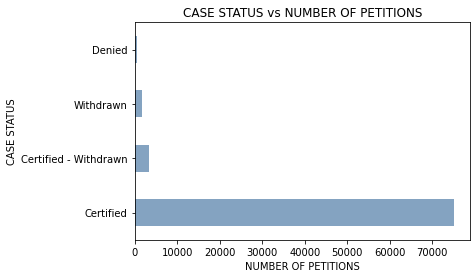

Certified                75064
Certified - Withdrawn     3333
Withdrawn                 1723
Denied                     502
Name: CASE_STATUS, dtype: int64


In [26]:
plot_status_numberinit = df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'barh', color = (0.2, 0.4, 0.6, 0.6))
plot_status_numberinit.set_ylabel("CASE STATUS")
plot_status_numberinit.set_xlabel("NUMBER OF PETITIONS")
plt.show()
print(df['CASE_STATUS'].value_counts())

### **Row Counts v/s Case Status**

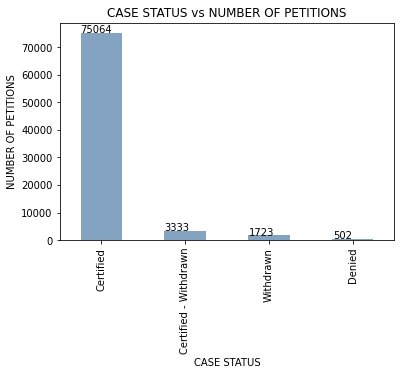

In [25]:
plot_status_number = df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = (0.2, 0.4, 0.6, 0.6))
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plot_status_number

###**The top 15 employers filing the H1-B visa petitions**

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    2406
Ernst & Young U.S. LLP                    1136
AMAZON.COM SERVICES LLC                   1062
Microsoft Corporation                     1024
HCL AMERICA, INC.                          843
Accenture LLP                              833
Google LLC                                 799
Amazon.com Services LLC                    598
Apple Inc.                                 556
Qualcomm Technologies, Inc.                479
Deloitte Consulting LLP                    445
Intel Corporation                          417
COMPUNNEL SOFTWARE GROUP, INC              416
INFOSYS LIMITED                            415
TECH MAHINDRA (AMERICAS), INC              385
Name: EMPLOYER_NAME, dtype: int64


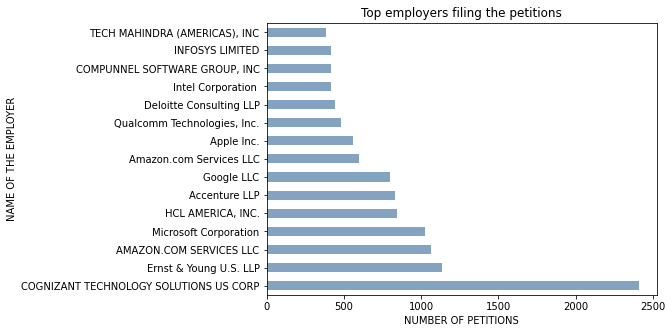

In [24]:
plot_status_topemp= df['EMPLOYER_NAME'].value_counts().head(15).plot.barh(title = "Top employers filing the petitions", \
                                                                 color = (0.2, 0.4, 0.6, 0.6), figsize = (7, 5))
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")
plot_status_topemp
print(df['EMPLOYER_NAME'].value_counts().head(15))

###**Top 15 SOC codes for which H1-B visas are raised**

15-1132    27407
15-1199     9769
15-1133     5523
15-1121     5329
11-3021     1801
17-2141     1458
15-2041     1315
17-2072     1284
15-1131     1201
15-2031     1194
13-2011     1164
15-1141     1139
17-2071     1000
13-2051      997
13-1111      989
Name: SOC_CODE, dtype: int64


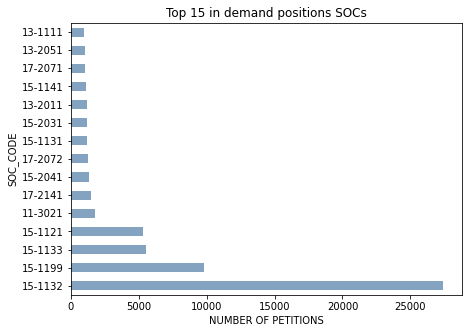

In [23]:
plot_status_topsoc= df['SOC_CODE'].value_counts().head(15).plot.barh(title = "Top 15 in demand positions SOCs", \
                                                                 color =(0.2, 0.4, 0.6, 0.6), figsize = (7, 5))
plot_status_topsoc.set_ylabel("SOC_CODE")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")
plot_status_topsoc
print(df['SOC_CODE'].value_counts().head(15))

## **Data PreProcessing**

### **Filtering only the required columns into dataframe, which will be our input to the model**

In [ ]:
df=df[['CASE_STATUS', 'BEGIN_DATE', 'END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_STATE', 'SOC_CODE', 'NAICS_CODE',
        'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'H1B_DEPENDENT', 'WORKSITE_COUNTY',
       'WORKSITE_STATE', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY']]

In [ ]:
df

,CASE_STATUS,BEGIN_DATE,END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY
0,Certified,2021-02-13,2024-02-12,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,97406.0,Year,Y,FAIRFAX,VA,N,Y,103770.0,Year
1,Certified,2020-09-24,2023-09-23,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,84510.0,Year,Y,GALVESTON,TX,N,Y,84510.0,Year
2,Certified,2020-09-25,2023-09-24,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,70678.0,Year,Y,CUYAHOGA,OH,N,Y,70678.0,Year
3,Certified,2020-10-01,2023-09-30,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,81453.0,Year,Y,HARTFORD CITY,CT,N,Y,103376.0,Year
4,Certified,2020-10-05,2022-06-29,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,91146.0,Year,Y,WILLIAMSON,TX,N,Y,91146.0,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80617,Withdrawn,2021-01-18,2024-01-17,"Facebook, Inc.",CA,15-1199,51913,0,0,0,0,0,1,Y,97510.0,Year,NaN,KING,WA,NaN,NaN,150000.0,Year
80618,Withdrawn,2021-01-08,2023-01-08,TOP QUALITY PAINTING INC.,MO,13-1111,238320,0,1,0,0,0,0,Y,49878.0,Year,NaN,ST CHARLES,MO,NaN,NaN,49878.0,Year
80619,Withdrawn,2021-02-21,2023-02-21,InsideSherpa Inc,NY,11-2022,611710,1,0,0,0,0,0,Y,110594.0,Year,NaN,NEW YORK,NY,NaN,NaN,138000.0,Year
80620,Withdrawn,2021-03-01,2023-03-01,"VT Mobile Aerospace Engineering, Inc.",AL,11-9199,336411,1,0,0,0,0,0,Y,72634.0,Year,NaN,MOBILE,AL,NaN,NaN,80690.0,Year


### **Checking null values in the records**

In [ ]:
df.isna().sum()

CASE_STATUS                       0
BEGIN_DATE                        0
END_DATE                          0
EMPLOYER_NAME                     0
EMPLOYER_STATE                    0
SOC_CODE                          0
NAICS_CODE                        0
NEW_EMPLOYMENT                    0
CONTINUED_EMPLOYMENT              0
CHANGE_PREVIOUS_EMPLOYMENT        0
NEW_CONCURRENT_EMPLOYMENT         0
CHANGE_EMPLOYER                   0
AMENDED_PETITION                  0
FULL_TIME_POSITION                0
PREVAILING_WAGE                   0
PW_UNIT_OF_PAY                    0
H1B_DEPENDENT                  2635
WORKSITE_COUNTY                   2
WORKSITE_STATE                    0
WILLFUL_VIOLATOR               2636
SUPPORT_H1B                   55690
WAGE_RATE_OF_PAY_FROM             0
WAGE_UNIT_OF_PAY                  0
dtype: int64

In [ ]:
df.WILLFUL_VIOLATOR.value_counts()

N    77955
Y       31
Name: WILLFUL_VIOLATOR, dtype: int64

### **Converting categorical values of fields WILLFUL_VIOLATOR,SUPPORT_H1B, H1B_DEPENDENT etc into numerical values for the model training. Also replacing null values with the majority entries.**

In [ ]:
def get_encoding(x):
  if x=='Y':
    return 1
  return 0

In [ ]:
df['WILLFUL_VIOLATOR']=df['WILLFUL_VIOLATOR'].apply(lambda x : get_encoding(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.isna().sum()

CASE_STATUS                       0
BEGIN_DATE                        0
END_DATE                          0
EMPLOYER_NAME                     0
EMPLOYER_STATE                    0
SOC_CODE                          0
NAICS_CODE                        0
NEW_EMPLOYMENT                    0
CONTINUED_EMPLOYMENT              0
CHANGE_PREVIOUS_EMPLOYMENT        0
NEW_CONCURRENT_EMPLOYMENT         0
CHANGE_EMPLOYER                   0
AMENDED_PETITION                  0
FULL_TIME_POSITION                0
PREVAILING_WAGE                   0
PW_UNIT_OF_PAY                    0
H1B_DEPENDENT                  2635
WORKSITE_COUNTY                   2
WORKSITE_STATE                    0
WILLFUL_VIOLATOR                  0
SUPPORT_H1B                   55690
WAGE_RATE_OF_PAY_FROM             0
WAGE_UNIT_OF_PAY                  0
dtype: int64

In [ ]:
df.SUPPORT_H1B.value_counts()

Y    24711
N      221
Name: SUPPORT_H1B, dtype: int64

In [ ]:
df['SUPPORT_H1B']=df['SUPPORT_H1B'].apply(lambda x: get_encoding(x) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.isna().sum()

CASE_STATUS                      0
BEGIN_DATE                       0
END_DATE                         0
EMPLOYER_NAME                    0
EMPLOYER_STATE                   0
SOC_CODE                         0
NAICS_CODE                       0
NEW_EMPLOYMENT                   0
CONTINUED_EMPLOYMENT             0
CHANGE_PREVIOUS_EMPLOYMENT       0
NEW_CONCURRENT_EMPLOYMENT        0
CHANGE_EMPLOYER                  0
AMENDED_PETITION                 0
FULL_TIME_POSITION               0
PREVAILING_WAGE                  0
PW_UNIT_OF_PAY                   0
H1B_DEPENDENT                 2635
WORKSITE_COUNTY                  2
WORKSITE_STATE                   0
WILLFUL_VIOLATOR                 0
SUPPORT_H1B                      0
WAGE_RATE_OF_PAY_FROM            0
WAGE_UNIT_OF_PAY                 0
dtype: int64

In [ ]:
df.H1B_DEPENDENT.value_counts()

N    53061
Y    24926
Name: H1B_DEPENDENT, dtype: int64

In [ ]:
df['H1B_DEPENDENT']=df['H1B_DEPENDENT'].apply(lambda x: get_encoding(x) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **Pre-processed Dataframe**

In [ ]:
df

,CASE_STATUS,BEGIN_DATE,END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY
0,Certified,2021-02-13,2024-02-12,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,97406.0,Year,1,FAIRFAX,VA,0,1,103770.0,Year
1,Certified,2020-09-24,2023-09-23,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,84510.0,Year,1,GALVESTON,TX,0,1,84510.0,Year
2,Certified,2020-09-25,2023-09-24,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,70678.0,Year,1,CUYAHOGA,OH,0,1,70678.0,Year
3,Certified,2020-10-01,2023-09-30,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,81453.0,Year,1,HARTFORD CITY,CT,0,1,103376.0,Year
4,Certified,2020-10-05,2022-06-29,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,91146.0,Year,1,WILLIAMSON,TX,0,1,91146.0,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80617,Withdrawn,2021-01-18,2024-01-17,"Facebook, Inc.",CA,15-1199,51913,0,0,0,0,0,1,Y,97510.0,Year,0,KING,WA,0,0,150000.0,Year
80618,Withdrawn,2021-01-08,2023-01-08,TOP QUALITY PAINTING INC.,MO,13-1111,238320,0,1,0,0,0,0,Y,49878.0,Year,0,ST CHARLES,MO,0,0,49878.0,Year
80619,Withdrawn,2021-02-21,2023-02-21,InsideSherpa Inc,NY,11-2022,611710,1,0,0,0,0,0,Y,110594.0,Year,0,NEW YORK,NY,0,0,138000.0,Year
80620,Withdrawn,2021-03-01,2023-03-01,"VT Mobile Aerospace Engineering, Inc.",AL,11-9199,336411,1,0,0,0,0,0,Y,72634.0,Year,0,MOBILE,AL,0,0,80690.0,Year


## **Feature Engineering**

The dataset includes PREVAILING_WAGE_int which specifies the wage of the applicant Yearly, Hourly, Monthly Weekly & Biweekly. This occurence of payment is given. by filed WAGE_UNIT_OF_PAY. As it is difficult to use wages with different occurence for the different employees, we have added a feature "**Total_Wage**", which specifies the annual income of the applicant.

We have deduced this by adding another feature "**multiplier**", which is used in the formula (df.PREVAILING_WAGE_int)*df.multiplier to calculate Total_Wage

In [ ]:
z=[]
for index,row in df.iterrows():
    if row.WAGE_UNIT_OF_PAY=='Year':
        z.append(1)
    elif row.WAGE_UNIT_OF_PAY=='Hour':
        z.append(1920)
    elif row.WAGE_UNIT_OF_PAY=='Month':
        z.append(12)
    elif row.WAGE_UNIT_OF_PAY=='Week':
        z.append(48)
    elif row.WAGE_UNIT_OF_PAY=='Bi-Weekly':
        z.append(96)
    else:
        z.append(0)

In [ ]:
df['multiplier']=z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['PREVAILING_WAGE_int']=pd.to_numeric(df.PREVAILING_WAGE)
df['Total_Wage']=(df.PREVAILING_WAGE_int)*df.multiplier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.columns

Index(['CASE_STATUS', 'BEGIN_DATE', 'END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_STATE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'WAGE_RATE_OF_PAY_FROM',
       'WAGE_UNIT_OF_PAY', 'multiplier', 'PREVAILING_WAGE_int', 'Total_Wage'],
      dtype='object')

In [ ]:
df

,CASE_STATUS,BEGIN_DATE,END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_COUNTY,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,multiplier,PREVAILING_WAGE_int,Total_Wage
0,Certified,2021-02-13,2024-02-12,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,97406.0,Year,1,FAIRFAX,VA,0,1,103770.0,Year,1,97406.0,97406.0
1,Certified,2020-09-24,2023-09-23,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,84510.0,Year,1,GALVESTON,TX,0,1,84510.0,Year,1,84510.0,84510.0
2,Certified,2020-09-25,2023-09-24,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,70678.0,Year,1,CUYAHOGA,OH,0,1,70678.0,Year,1,70678.0,70678.0
3,Certified,2020-10-01,2023-09-30,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,81453.0,Year,1,HARTFORD CITY,CT,0,1,103376.0,Year,1,81453.0,81453.0
4,Certified,2020-10-05,2022-06-29,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,91146.0,Year,1,WILLIAMSON,TX,0,1,91146.0,Year,1,91146.0,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80617,Withdrawn,2021-01-18,2024-01-17,"Facebook, Inc.",CA,15-1199,51913,0,0,0,0,0,1,Y,97510.0,Year,0,KING,WA,0,0,150000.0,Year,1,97510.0,97510.0
80618,Withdrawn,2021-01-08,2023-01-08,TOP QUALITY PAINTING INC.,MO,13-1111,238320,0,1,0,0,0,0,Y,49878.0,Year,0,ST CHARLES,MO,0,0,49878.0,Year,1,49878.0,49878.0
80619,Withdrawn,2021-02-21,2023-02-21,InsideSherpa Inc,NY,11-2022,611710,1,0,0,0,0,0,Y,110594.0,Year,0,NEW YORK,NY,0,0,138000.0,Year,1,110594.0,110594.0
80620,Withdrawn,2021-03-01,2023-03-01,"VT Mobile Aerospace Engineering, Inc.",AL,11-9199,336411,1,0,0,0,0,0,Y,72634.0,Year,0,MOBILE,AL,0,0,80690.0,Year,1,72634.0,72634.0


## **Data Pre-processing-2**

In [ ]:
df=df[['CASE_STATUS', 'EMPLOYER_NAME',
       'EMPLOYER_STATE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION',
       'H1B_DEPENDENT','WORKSITE_STATE',
       'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'Total_Wage']]

In [ ]:
df.CASE_STATUS.value_counts()

Certified                75064
Certified - Withdrawn     3333
Withdrawn                 1723
Denied                     502
Name: CASE_STATUS, dtype: int64

For our model. training, we will be using dataframe with CASE_STATUS Certified or Denied, to make the prediction have better accuracy.

In [ ]:
df = df.drop(df[(df.CASE_STATUS =='Certified - Withdrawn')].index)
df = df.drop(df[(df.CASE_STATUS =='Withdrawn')].index)

In [ ]:
df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,Certified,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,Y,1,VA,0,1,97406.0
1,Certified,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,Y,1,TX,0,1,84510.0
2,Certified,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,Y,1,OH,0,1,70678.0
3,Certified,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,Y,1,CT,0,1,81453.0
4,Certified,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,Y,1,TX,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,Denied,Blueboard Inc.,CA,11-3031,51121,0,0,0,0,1,0,Y,0,CA,0,0,141315.0
80569,Denied,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,Y,0,HI,0,0,57310.0
80570,Denied,Seabury Hall,HI,25-2022,611110,1,0,0,0,1,0,Y,0,HI,0,0,54150.0
80571,Denied,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,Y,0,HI,0,0,57310.0


In [ ]:
def get_case_status(x):
  if x=='Certified':
    return 1
  return 0

In [ ]:
def get_full_time_pos(x):
  if x=='Y':
    return 1
  return 0

### **Converting categorical values to numerical manually**

In [ ]:
df['CASE_STATUS']=df['CASE_STATUS'].apply(lambda x : get_case_status(x))

In [ ]:
df['FULL_TIME_POSITION']=df['FULL_TIME_POSITION'].apply(lambda x : get_full_time_pos(x))

In [ ]:
df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,1,Hexaware Technologies Inc.,NJ,15-1132,541512,0,1,0,0,0,0,1,1,VA,0,1,97406.0
1,1,WIPRO LIMITED,NJ,15-1131,541511,0,1,0,0,0,0,1,1,TX,0,1,84510.0
2,1,"Mastech Digital InfoTech, Inc.",PA,15-1132,541511,1,1,1,1,1,1,1,1,OH,0,1,70678.0
3,1,VIRTUSA CORPORATION,MA,15-1121,541511,0,0,0,0,0,1,1,1,CT,0,1,81453.0
4,1,"XTGLOBAL, INC.",TX,15-1141,541511,0,0,0,0,0,1,1,1,TX,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,0,Blueboard Inc.,CA,11-3031,51121,0,0,0,0,1,0,1,0,CA,0,0,141315.0
80569,0,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,1,0,HI,0,0,57310.0
80570,0,Seabury Hall,HI,25-2022,611110,1,0,0,0,1,0,1,0,HI,0,0,54150.0
80571,0,Seabury Hall,HI,25-2031,611110,1,0,0,0,1,0,1,0,HI,0,0,57310.0


In [ ]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'SOC_CODE',
       'NAICS_CODE', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'FULL_TIME_POSITION',
       'H1B_DEPENDENT', 'WORKSITE_STATE', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B',
       'Total_Wage'],
      dtype='object')

In [ ]:
EMPLOYER_NAME=df.EMPLOYER_NAME.unique()
with open('EMPLOYER_NAME.txt', 'w') as filehandle:
    for listitem in EMPLOYER_NAME:
        filehandle.write(str(listitem)+ '\n')

In [ ]:
EMPLOYER_STATE=df.EMPLOYER_STATE.unique()
with open('EMPLOYER_STATE.txt', 'w') as filehandle:
    for listitem in EMPLOYER_STATE:
        filehandle.write(str(listitem)+ '\n')

In [ ]:
SOC_CODE=df.SOC_CODE.unique()
with open('SOC_CODE.txt', 'w') as filehandle:
    for listitem in SOC_CODE:
        filehandle.write(str(listitem)+ '\n')

In [ ]:
NAICS_CODE=df.NAICS_CODE.unique()
with open('NAICS_CODE.txt', 'w') as filehandle:
    for listitem in NAICS_CODE:
        filehandle.write(str(listitem)+ '\n')

In [ ]:
WORKSITE_STATE=df.WORKSITE_STATE.unique()
with open('WORKSITE_STATE.txt', 'w') as filehandle:
    for listitem in WORKSITE_STATE:
        filehandle.write(str(listitem)+ '\n')

### **Using label encoders to convert categorical values to numeric values**

In [ ]:
from sklearn import preprocessing

In [ ]:
EMPLOYER_NAME_le = preprocessing.LabelEncoder()
EMPLOYER_STATE_le = preprocessing.LabelEncoder()
SOC_CODE_le = preprocessing.LabelEncoder()
NAICS_CODE_le = preprocessing.LabelEncoder()
WORKSITE_STATE_le = preprocessing.LabelEncoder()

In [ ]:
x=df

In [ ]:
x.EMPLOYER_NAME=EMPLOYER_NAME_le.fit_transform(x.EMPLOYER_NAME.astype(str))
x.EMPLOYER_STATE=EMPLOYER_STATE_le.fit_transform(x.EMPLOYER_STATE.astype(str))
x.SOC_CODE=SOC_CODE_le.fit_transform(x.SOC_CODE.astype(str))
x.NAICS_CODE=NAICS_CODE_le.fit_transform(x.NAICS_CODE.astype(str))
x.WORKSITE_STATE=WORKSITE_STATE_le.fit_transform(x.WORKSITE_STATE.astype(str))

### **Dumping the label encoders using pickle to use it in our Django App**

In [ ]:
import pickle

In [ ]:
pickle.dump(EMPLOYER_NAME_le, open('EMPLOYER_NAME_le', 'wb'))
pickle.dump(EMPLOYER_STATE_le, open('EMPLOYER_STATE_le', 'wb'))
pickle.dump(SOC_CODE_le, open('SOC_CODE_le', 'wb'))
pickle.dump(NAICS_CODE_le, open('NAICS_CODE_le', 'wb'))
pickle.dump(WORKSITE_STATE_le, open('WORKSITE_STATE_le', 'wb'))

In [ ]:
x

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,1,6352,33,66,909,0,1,0,0,0,0,1,1,48,0,1,97406.0
1,1,15416,33,65,908,0,1,0,0,0,0,1,1,46,0,1,84510.0
2,1,8786,40,66,908,1,1,1,1,1,1,1,1,37,0,1,70678.0
3,1,15013,20,63,908,0,0,0,0,0,1,1,1,6,0,1,81453.0
4,1,15754,46,69,908,0,0,0,0,0,1,1,1,46,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,0,2144,4,8,726,0,0,0,0,1,0,1,0,4,0,0,141315.0
80569,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0
80570,0,12535,12,222,1008,1,0,0,0,1,0,1,0,12,0,0,54150.0
80571,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0


## **Model Training**

We have used following classifiers, to predict LCA status of a candidate.


* Nearest Neighbors
* Decision Tree
* Random Forest
* Neural Net
* AdaBoost
* Naive Bayes
* QDA
* XG
* LinearRegression

In [ ]:
X=x.drop('CASE_STATUS', axis=1)

In [ ]:
Y=x.CASE_STATUS

In [ ]:
Y.value_counts()

1    75064
0      502
Name: CASE_STATUS, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

In [ ]:
import xgboost
names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","XG","LinearRegression"]

classifiers = [
    KNeighborsClassifier(2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    ]

**Splitting train & test data**

In [ ]:
trainX, testX = train_test_split(X, test_size=0.30, random_state=1)
trainY, testY = train_test_split(Y, test_size=0.30, random_state=1)
trainX

,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
64712,5046,36,66,908,0,1,0,0,0,0,1,0,52,0,0,115856.0
46269,7825,33,63,909,0,0,0,0,0,1,1,1,6,0,1,106205.0
59542,332,36,101,889,0,0,0,0,0,1,1,0,36,0,0,81848.0
46058,14160,36,132,1013,1,0,0,0,0,0,1,0,36,0,0,51912.0
44075,2616,46,63,909,0,1,0,0,0,0,1,1,15,0,1,91520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20609,6062,4,74,908,0,0,0,0,1,0,1,1,51,0,1,97510.0
21440,3670,4,74,911,0,0,0,0,1,0,1,0,16,0,0,145579.0
78247,11440,5,1,725,0,1,0,0,0,0,1,0,35,0,0,92227.0
50057,5135,4,66,765,0,0,0,0,0,1,1,1,4,0,1,136056.0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import seaborn as sns
import pickle
from time import time
from sklearn.utils import resample

In [ ]:
def muller_loop(trainX, testX, trainY, testY):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  score_compare={}
  index=0
  accuracy={}
  specificity={}
  sensitivity={}
  for name, clf in zip(names, classifiers):
      # print(accuracy)
      start_time = time()
      clf.fit(trainX, trainY)
      pickle.dump(clf, open(name, 'wb'))

      score = 100.0 * clf.score(testX, testY)
      y_pred=clf.predict(testX)
      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
      
      
      accuracy[names[index]]=accuracy_score(testY,y_pred)*100
      cm=confusion_matrix(testY, y_pred)

      print(cm)
      sensitivity[names[index]] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      specificity[names[index]] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      index+=1
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

      print(80*'-*')

  print(80*'-' )
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  print(accuracy)
  accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
  sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
  specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
  # print(accuracy)
  accuracy.columns=['model_name','accuracy']
  sensitivity.columns=['model_name','sensitivity']
  specificity.columns=['model_name','specificity']
  plt.figure(figsize=(16, 6))
  ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

Classifier = Nearest Neighbors, Score (test, accuracy) = 98.40, Training time = 30.82 seconds
[[   27   128]
 [  235 22280]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Decision Tree, Score (test, accuracy) = 99.33, Training time = 0.12 seconds
[[    4   151]
 [    0 22515]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Random Forest, Score (test, accuracy) = 99.32, Training time = 0.18 seconds
[[    0   155]
 [    0 22515]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Neural Net, Score (test, accuracy) = 99.30, Training time = 21.28 seconds
[[    1   154]
 [    5 22510]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


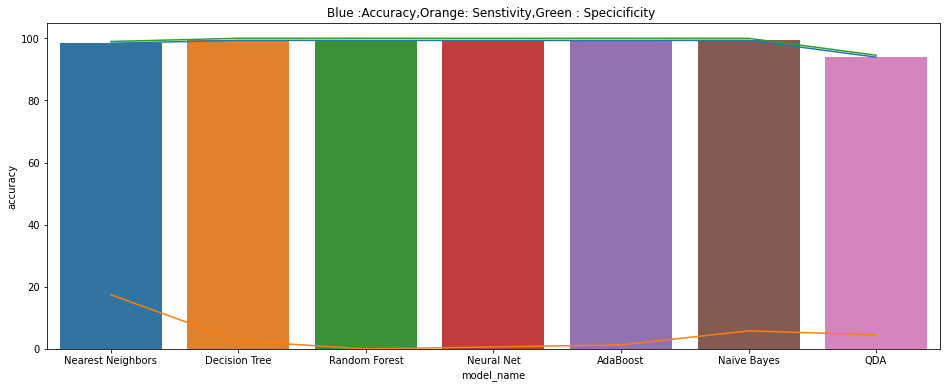

In [ ]:
muller_loop(trainX, testX, trainY, testY)

## **Evaluation & Results**

From the above graph, it is deduced that most the classifier models have the accuracy of 99.33. This is beacuse the dataset has as huge as 75064 records for certified LCA candidates & only 500 records of rejected LCA candidates. Beacuse of such data discrepencies, model is overfitting.

Hence we have explored Upsampling & Downsampling.


In [ ]:
x

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,H1B_DEPENDENT,WORKSITE_STATE,WILLFUL_VIOLATOR,SUPPORT_H1B,Total_Wage
0,1,6352,33,66,909,0,1,0,0,0,0,1,1,48,0,1,97406.0
1,1,15416,33,65,908,0,1,0,0,0,0,1,1,46,0,1,84510.0
2,1,8786,40,66,908,1,1,1,1,1,1,1,1,37,0,1,70678.0
3,1,15013,20,63,908,0,0,0,0,0,1,1,1,6,0,1,81453.0
4,1,15754,46,69,908,0,0,0,0,0,1,1,1,46,0,1,91146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80568,0,2144,4,8,726,0,0,0,0,1,0,1,0,4,0,0,141315.0
80569,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0
80570,0,12535,12,222,1008,1,0,0,0,1,0,1,0,12,0,0,54150.0
80571,0,12535,12,223,1008,1,0,0,0,1,0,1,0,12,0,0,57310.0


In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
80568    0
80569    0
80570    0
80571    0
80572    0
Name: CASE_STATUS, Length: 75566, dtype: int64

## **Upsampling**

Classifier = Nearest Neighbors, Score (test, accuracy) = 99.23, Training time = 117.37 seconds
[[22363     0]
 [  349 22327]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Decision Tree, Score (test, accuracy) = 68.21, Training time = 0.22 seconds
[[14709  7654]
 [ 6664 16012]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Random Forest, Score (test, accuracy) = 66.09, Training time = 0.33 seconds
[[13128  9235]
 [ 6038 16638]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Neural Net, Score (test, accuracy) = 54.82, Training time = 45.25 seconds
[[14925  7438]
 [12910  9766]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (

Classifier = QDA, Score (test, accuracy) = 49.65, Training time = 0.17 seconds
[[22363     0]
 [22676     0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
--------------------------------------------------------------------------------
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 99.23
{'Nearest Neighbors': 99.22511601056861, 'Decision Tree': 68.20977375163747, 'Random Forest': 66.08938919603011, 'Neural Net': 54.82137702879727, 'AdaBoost': 71.47139146073404, 'Naive Bayes': 52.42567552565555, 'QDA': 49.65252336863607}


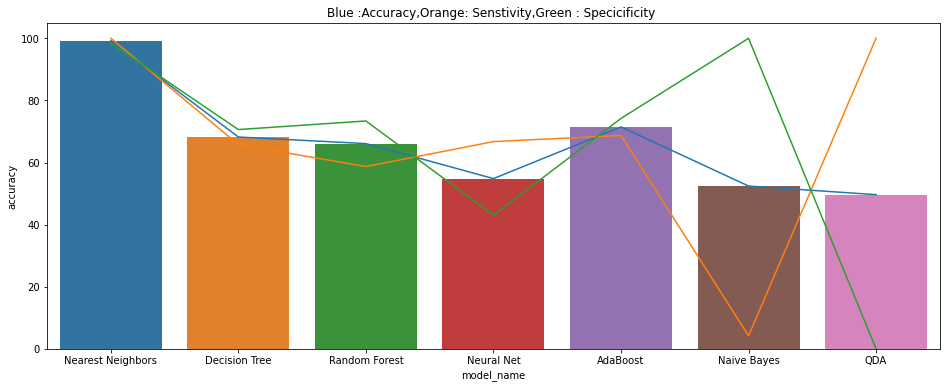

In [ ]:
yes = x[x.CASE_STATUS==1]
no = x[x.CASE_STATUS==0]

no_upsampled = resample(no,
replace=True, 
n_samples=len(yes), 
random_state=27) 


upsampled = pd.concat([yes,no_upsampled])



trainX, testX = train_test_split(upsampled[upsampled.columns.difference(['CASE_STATUS'])], test_size=0.30, random_state=1)
trainY, testY = train_test_split(upsampled['CASE_STATUS'], test_size=0.30, random_state=1)

muller_loop(trainX, testX, trainY, testY)


## **DownSampling**

In [ ]:
yes = x[x.CASE_STATUS==1]
no = x[x.CASE_STATUS==0]

yes_downsampled = resample(yes,
replace=True, 
n_samples=len(no), 
random_state=27) 

downsampled = pd.concat([yes_downsampled,no])


trainX, testX = train_test_split(downsampled[downsampled.columns.difference(['CASE_STATUS'])], test_size=0.30, random_state=1)
trainY, testY = train_test_split(downsampled['CASE_STATUS'], test_size=0.30, random_state=1)

muller_loop(trainX, testX, trainY, testY)

**With upsampling & downsampling, we can see that Nearest Neighbor classifier model has the highest accuracy. Hence we have pickled this model & integrated in our Django Application.**